In [1]:
# from models import train
# from pathlib import Path
# from utils import visualize_gif, visualize_tensor
# from utils import create_default_image

In [112]:
# Hack to always autoreload modules and avoid restarting the kernel each time

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Note: This is a hack to allow importing from the parent directory
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

Files already downloaded and verified
torch.Size([32, 32, 3])


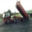

In [11]:
import torchvision
from constants import CIFAR10_TRANSFORM
from utils.data import create_default_image

dataset = torchvision.datasets.CIFAR10(root="./data", download=True)
image = CIFAR10_TRANSFORM(dataset[2][0])
image = create_default_image(32,32)
print(image.shape)
dataset[2][0]

Iteration 1/1000, Loss: 0.9903871417045593
Iteration 101/1000, Loss: 0.5338200330734253
Iteration 201/1000, Loss: 0.4073825776576996
Iteration 301/1000, Loss: 0.38021811842918396
Iteration 401/1000, Loss: 0.37388259172439575
Iteration 501/1000, Loss: 0.3658679127693176
Iteration 601/1000, Loss: 0.3600776195526123
Iteration 701/1000, Loss: 0.35444149374961853
Iteration 801/1000, Loss: 0.3501492440700531
Iteration 901/1000, Loss: 0.3506612181663513
GIF saved to: animation_results.gif


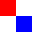

JPG image saved to: original_results.jpg


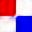

JPG image saved to: final_results.jpg
Final loss: 0.3483160138130188
Total Time: Rasterization: 1.146s, Backward: 0.759s


In [12]:
from models.basic_gaussian_image_trainer import GaussianImageTrainer as GaussianImageTrainerBak
from pathlib import Path
trainer = GaussianImageTrainerBak(gt_image=image, num_points=1024, )
trainer.train(iterations=1000, lr=0.01, results_path=Path("./results"), model_type="3dgs")

In [54]:
from models.gaussian_image_trainer import GaussianImageTrainer
from configs import Config
from pathlib import Path
from utils.data import create_default_image
from dataclasses import dataclass, field
import torch
import numpy as np

In [105]:
config = Config(
    seed=42,
    image=create_default_image(32,32),
    batch_size=1,
    results_path=Path("./results"),
    logs_path=Path("./logs"),
    max_steps=1000,
    learning_rate=0.001,
    model_type="2dgs",
    init_type="random",
    num_points=1024,
    extent=2.0,
    init_opacity=1.0,
    init_scale=1.0,
    learnable_params={
            "means": True,
            "quats": True,
            "scales": True,
            "opacities": True,
            "colors": True,
        },
    group_optimization=True,
)

In [113]:
trainer = GaussianImageTrainer(config)

Model initialized. Number of Gaussians: 1024


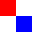

JPG image saved to: results/original.jpg


Loss: 0.989 (L1: 0.977, MSE: 0.989, SSIM: 1.002):   0%|                  | 0/1000 [00:00<?, ?step/s]

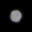

Loss: 0.983 (L1: 0.971, MSE: 0.976, SSIM: 1.001):   2%|▏       | 18/1000 [00:00<00:05, 166.95step/s]

JPG image saved to: results/step_00000.jpg


Loss: 0.966 (L1: 0.953, MSE: 0.947, SSIM: 0.997):   9%|▋       | 91/1000 [00:00<00:05, 169.91step/s]

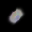

Loss: 0.955 (L1: 0.942, MSE: 0.929, SSIM: 0.995):  13%|▉      | 127/1000 [00:00<00:05, 172.30step/s]

JPG image saved to: results/step_00100.jpg


Loss: 0.930 (L1: 0.913, MSE: 0.889, SSIM: 0.988):  20%|█▍     | 200/1000 [00:01<00:04, 171.77step/s]

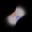

Loss: 0.915 (L1: 0.896, MSE: 0.866, SSIM: 0.984):  22%|█▌     | 218/1000 [00:01<00:04, 166.58step/s]

JPG image saved to: results/step_00200.jpg


Loss: 0.869 (L1: 0.841, MSE: 0.793, SSIM: 0.971):  29%|██     | 293/1000 [00:01<00:04, 176.59step/s]

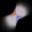

Loss: 0.842 (L1: 0.810, MSE: 0.753, SSIM: 0.963):  33%|██▎    | 329/1000 [00:01<00:03, 170.92step/s]

JPG image saved to: results/step_00300.jpg


Loss: 0.773 (L1: 0.728, MSE: 0.660, SSIM: 0.930):  39%|██▋    | 389/1000 [00:02<00:03, 188.77step/s]

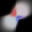

Loss: 0.739 (L1: 0.688, MSE: 0.624, SSIM: 0.903):  43%|███    | 430/1000 [00:02<00:02, 195.22step/s]

JPG image saved to: results/step_00400.jpg


Loss: 0.696 (L1: 0.644, MSE: 0.593, SSIM: 0.850):  49%|███▍   | 493/1000 [00:02<00:02, 201.26step/s]

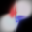

Loss: 0.669 (L1: 0.622, MSE: 0.580, SSIM: 0.804):  54%|███▊   | 536/1000 [00:02<00:02, 203.86step/s]

JPG image saved to: results/step_00500.jpg


Loss: 0.633 (L1: 0.597, MSE: 0.563, SSIM: 0.739):  60%|████▏  | 600/1000 [00:03<00:02, 199.39step/s]

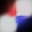

Loss: 0.614 (L1: 0.580, MSE: 0.547, SSIM: 0.716):  64%|████▍  | 641/1000 [00:03<00:01, 196.70step/s]

JPG image saved to: results/step_00600.jpg


Loss: 0.594 (L1: 0.557, MSE: 0.526, SSIM: 0.698):  68%|████▊  | 681/1000 [00:03<00:01, 197.21step/s]

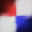

Loss: 0.579 (L1: 0.543, MSE: 0.512, SSIM: 0.684):  72%|█████  | 725/1000 [00:03<00:01, 205.96step/s]

JPG image saved to: results/step_00700.jpg


Loss: 0.565 (L1: 0.527, MSE: 0.498, SSIM: 0.671):  78%|█████▍ | 777/1000 [00:04<00:00, 230.02step/s]

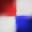

Loss: 0.555 (L1: 0.516, MSE: 0.490, SSIM: 0.658):  82%|█████▊ | 825/1000 [00:04<00:00, 232.74step/s]

JPG image saved to: results/step_00800.jpg


Loss: 0.542 (L1: 0.503, MSE: 0.481, SSIM: 0.640):  88%|██████▏| 877/1000 [00:04<00:00, 242.24step/s]

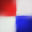

Loss: 0.531 (L1: 0.494, MSE: 0.476, SSIM: 0.623):  93%|██████▍| 927/1000 [00:04<00:00, 243.32step/s]

JPG image saved to: results/step_00900.jpg


Loss: 0.520 (L1: 0.486, MSE: 0.471, SSIM: 0.603): 100%|██████| 1000/1000 [00:05<00:00, 199.59step/s]


GIF saved to: results/animation.gif


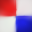

JPG image saved to: results/final.jpg
Final loss: 0.5191642045974731
Total Time: Rasterization: 0.727s, Backward: 2.185s


In [114]:
trainer.train()

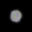

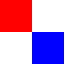

In [128]:
from pathlib import Path
from utils import visualize_gif, visualize_tensor
visualize_gif(Path("results/animation.gif"))

# print(create_default_image().shape)

from utils import create_default_image
visualize_tensor(create_default_image(64, 64))

In [122]:
!pwd

/workspace/visual-representation-learning/tests


In [129]:
x = Path("results/training")
print(f"temp/{x.with_name(f'test_{x.name}')}")

temp/results/test_training


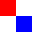

In [130]:
visualize_tensor(create_default_image())